# PCA and Clustering Assignment :

In [108]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [109]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Inspect the various aspects of the dataframe :

In [3]:
data.shape

(167, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [51]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Checking for duplicate rows :
data.duplicated().value_counts()

False    167
dtype: int64

False indicates that all the rows are distinct

In [10]:
# missing values :
round(100*(data.isnull().sum())/len(data), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

### Visualising the Data :

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

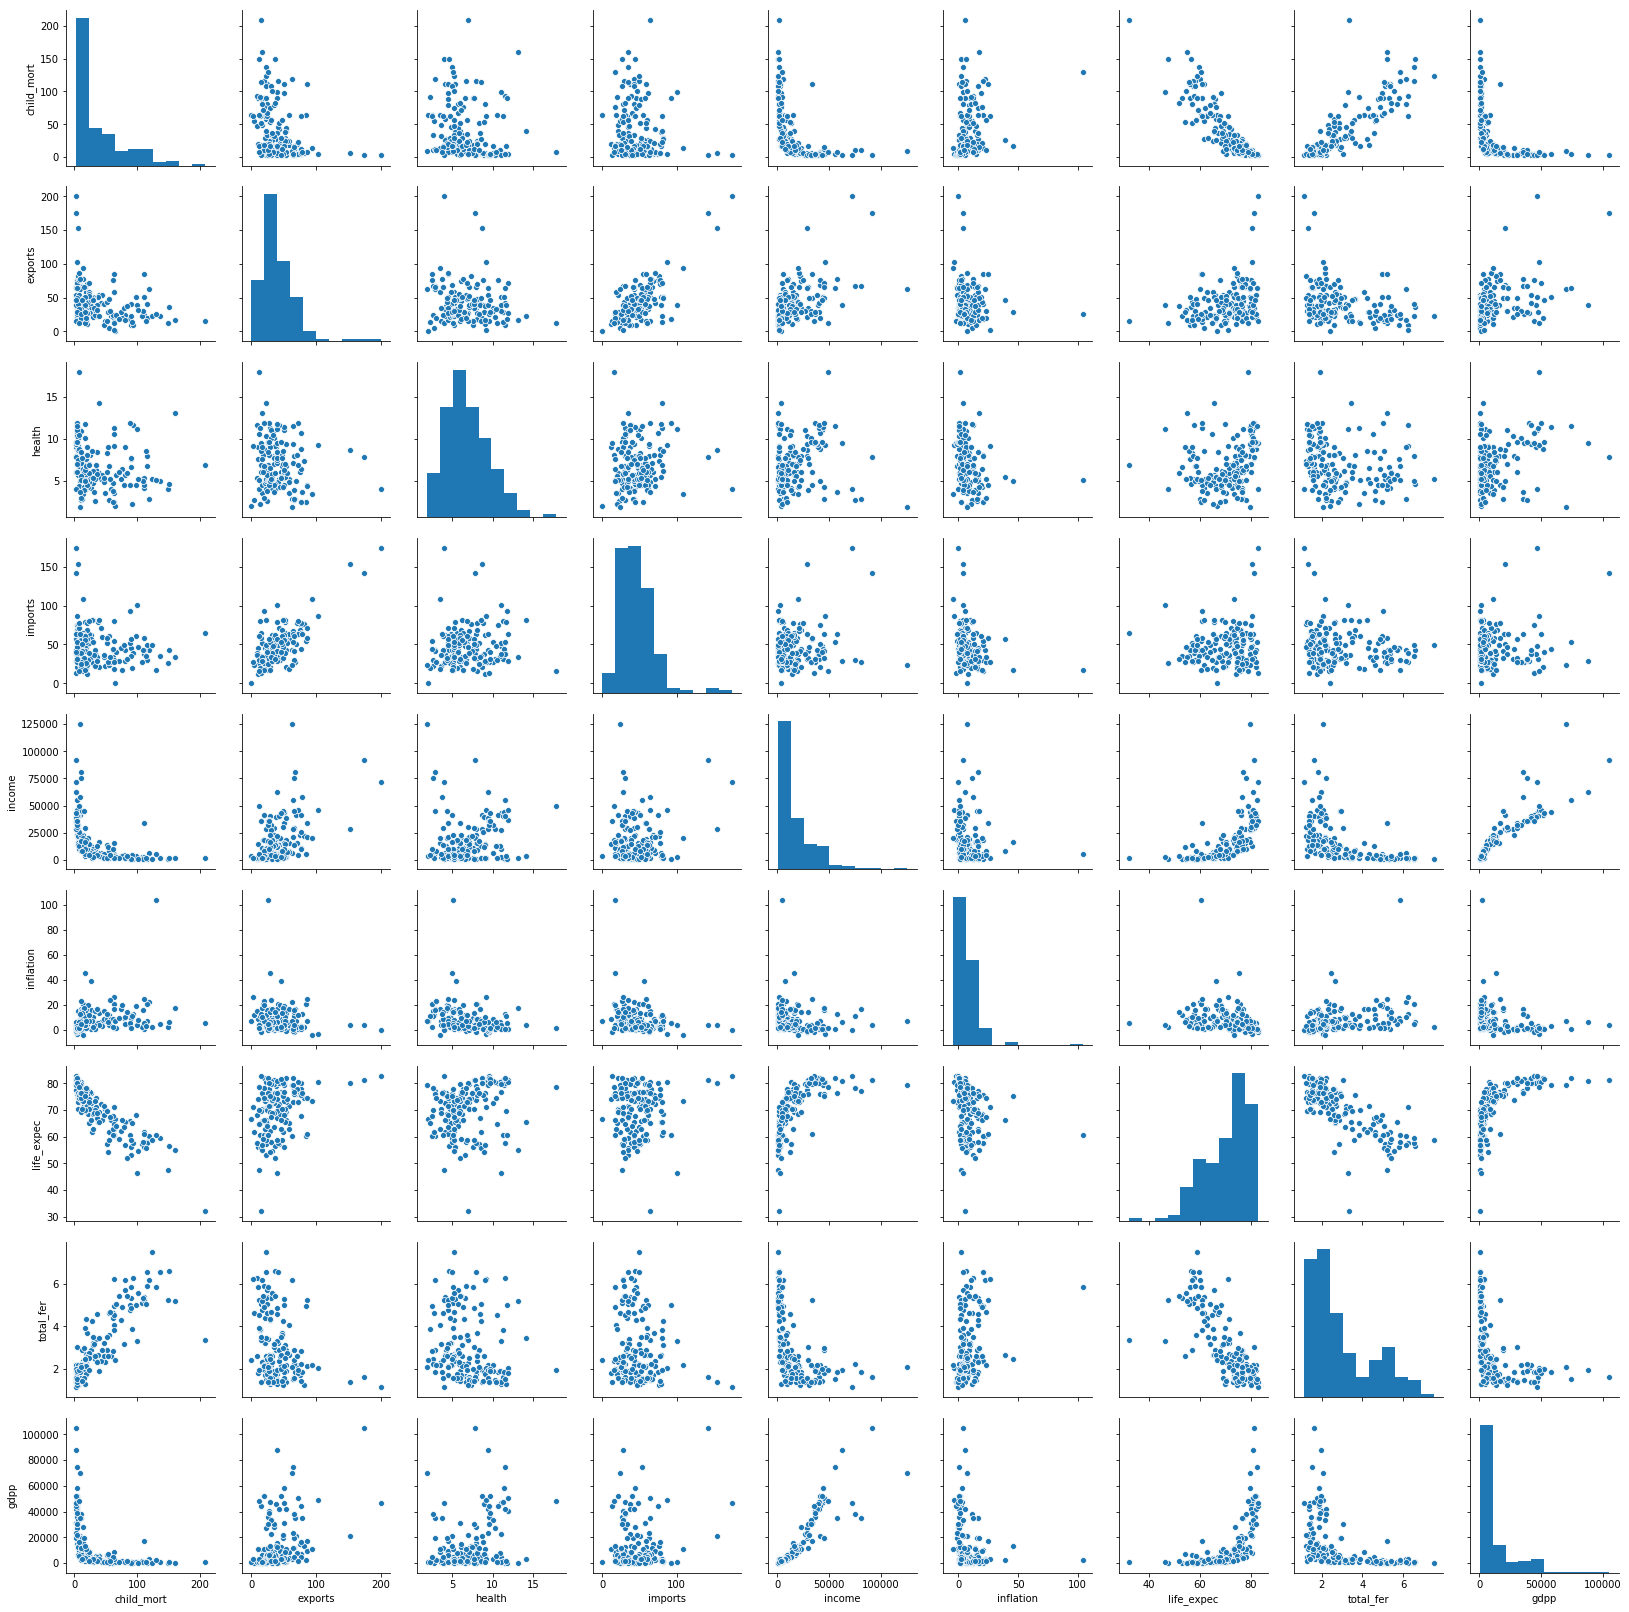

In [9]:
sns.pairplot(data)
plt.show()

In [111]:
# Creating ID column :
data['ID'] = 100+data.index
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,101
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,103
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104


In [112]:
# Let's preserve the ID column to some variable, so that we can make use of it later after perfroming PCA
ID = data['ID']
print(ID.head())

0    100
1    101
2    102
3    103
4    104
Name: ID, dtype: int64


In [113]:
# Now let's drop the ID column as it is not a predictor in our data.
dat1 = data.drop('ID', axis = 1)

#### Converting % values to absolute values :

In [114]:
dat1['exports_abs'] = (dat1['exports']*dat1['gdpp'])/100
dat1['health_abs'] = (dat1['health']*dat1['gdpp'])/100
dat1['imports_abs'] = (dat1['imports']*dat1['gdpp'])/100
dat1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,exports_abs,health_abs,imports_abs
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


In [115]:
# Droping the %value columns :
dat1 = dat1.drop('exports', axis = 1)
dat1 = dat1.drop('health', axis = 1)
dat1 = dat1.drop('imports', axis = 1)
dat1.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_abs,health_abs,imports_abs
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


### Feature Standardisation :

In [116]:
df = dat1[['child_mort','exports_abs','health_abs','imports_abs','income','inflation','life_expec','total_fer','gdpp']]

In [117]:
normalized_df=(df-df.mean())/df.std()
dat1 = dat1.drop(['child_mort','exports_abs','health_abs','imports_abs','income','inflation','life_expec','total_fer','gdpp'], 1)
dat1 = pd.concat([dat1,normalized_df],axis=1)
dat1.head()

,country,child_mort,exports_abs,health_abs,imports_abs,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,Albania,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,Algeria,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,Angola,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,Antigua and Barbuda,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


### PCA :

In [118]:
from sklearn.decomposition import PCA

In [119]:
pca = PCA(0.9)

In [120]:
x = dat1.pop('country')

In [121]:
dat1.head()

,child_mort,exports_abs,health_abs,imports_abs,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


In [122]:
df_pca = pca.fit_transform(dat1)

In [123]:
df_pca.shape

(167, 4)

#### Components from the PCA :

In [124]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239]])

In [125]:
#Looking at the explained variance ratio for each component :
pca.explained_variance_ratio_

array([0.58937298, 0.18445169, 0.09911472, 0.06072278])

Here we see that in the last Principal Component the variance is very low i.e. 0.06% so we can only have the first 3 Principal Components

#### Making a scree plot for the explained variance :

In [126]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

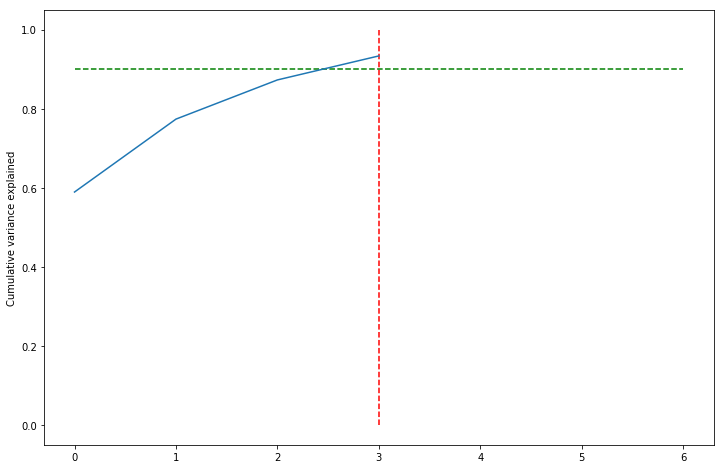

In [127]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=6, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 3 components :

In [128]:
from sklearn.decomposition import IncrementalPCA

In [129]:
pca_final = IncrementalPCA(n_components=3)

In [130]:
df_pca_final = pca_final.fit_transform(dat1)

In [131]:
df_pca_final.shape

(167, 3)

In [132]:
corrmat = np.corrcoef(df_pca_final.transpose())

In [133]:
corrmat.shape

(3, 3)

Plotting the heatmap of the corr matrix :

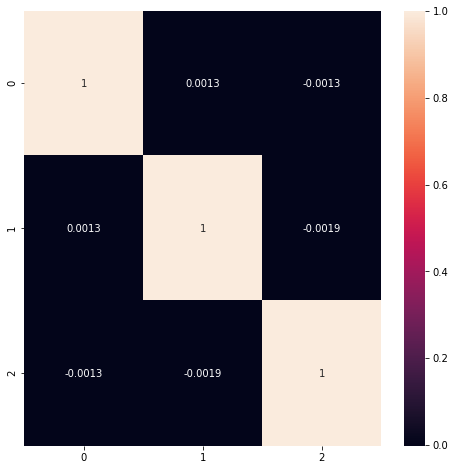

In [134]:
plt.figure(figsize=[8,8])
sns.heatmap(corrmat, annot=True)

In [135]:
pca_final.components_

array([[-0.31737656,  0.34291666,  0.35813462,  0.34508668,  0.37910308,
        -0.1426553 ,  0.34493671, -0.30294768,  0.39938296],
       [ 0.47712954,  0.39539211,  0.1573561 ,  0.36855339,  0.1300532 ,
         0.22357012, -0.36693004,  0.46108674,  0.20318431],
       [-0.15268373, -0.03631174, -0.09195502, -0.08683794,  0.17668143,
         0.94002038,  0.20112461, -0.06207913,  0.01459495]])

In [136]:
pca_final.explained_variance_ratio_

array([0.58904887, 0.18369955, 0.09778733])

Making a dataframe out of it for convenience :

In [137]:
df1 = pd.DataFrame(df_pca_final, columns=["PC1", "PC2","PC3"])
df1.head()

,PC1,PC2,PC3
0,-2.629533,1.464633,-0.539736
1,-0.022210,-1.427602,-0.020639
2,-0.456254,-0.671282,0.958983
3,-2.716351,2.168062,0.604867
4,0.647900,-1.021302,-0.249353


In [138]:
id = pd.DataFrame(ID)
df_final = pd.concat([df1, id], axis=1)
df_final.head()

,PC1,PC2,PC3,ID
0,-2.629533,1.464633,-0.539736,100
1,-0.022210,-1.427602,-0.020639,101
2,-0.456254,-0.671282,0.958983,102
3,-2.716351,2.168062,0.604867,103
4,0.647900,-1.021302,-0.249353,104


### Outlier Treatment : 

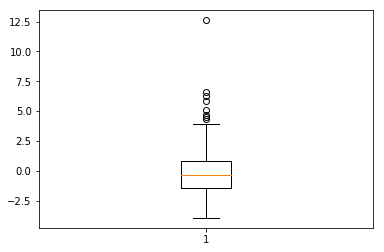

In [139]:
# For PC1 :
plt.boxplot(df_final.PC1)
Q1 = df_final.PC1.quantile(0.05)
Q3 = df_final.PC1.quantile(0.95)
df_final = df_final[(df_final.PC1 >= Q1) & (df_final.PC1 <= Q3)]

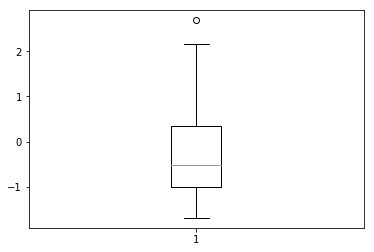

In [140]:
# For PC2 :
plt.boxplot(df_final.PC2)
Q1 = df_final.PC2.quantile(0.05)
Q3 = df_final.PC2.quantile(0.95)
df_final = df_final[(df_final.PC2 >= Q1) & (df_final.PC2 <= Q3)]

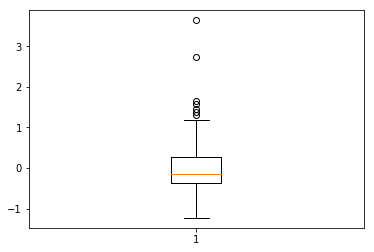

In [141]:
# For PC3 :
plt.boxplot(df_final.PC3)
Q1 = df_final.PC3.quantile(0.05)
Q3 = df_final.PC3.quantile(0.95)
df_final = df_final[(df_final.PC3 >= Q1) & (df_final.PC3 <= Q3)]

## Modelling :

#### Hopkins Statistic :

In [40]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [50]:
#Let's check the Hopkins measure
hopkins(df_final.drop(['ID'],axis=1))

0.8260095398842833

In [142]:
# Now for perfroming clustering, we need to again drop the ID column, Let's drop it
DF = df_final.drop(['ID'],axis=1).copy()

### Hierarchical Clustering :

Lets find the value of k from Hierarchical Clustering :

In [143]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [144]:
DF.head()

,PC1,PC2,PC3
0,-2.629533,1.464633,-0.539736
2,-0.456254,-0.671282,0.958983
4,0.647900,-1.021302,-0.249353
6,-0.331694,-1.270695,0.176106
7,3.170825,-0.250033,-0.116527


#### Single Linkage :

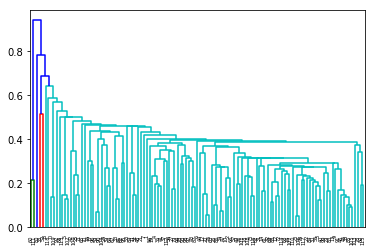

In [145]:
mergings = linkage(DF, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage :

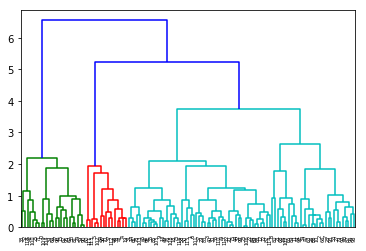

In [146]:
mergings = linkage(DF, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### k-means Clustering :

#### silhouette score analysis :

In [147]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [148]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(DF)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(DF, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.48734001035414415
For n_clusters=3, the silhouette score is 0.46397714562182485
For n_clusters=4, the silhouette score is 0.3987356568367149
For n_clusters=5, the silhouette score is 0.36170980333920083
For n_clusters=6, the silhouette score is 0.3521759308216294
For n_clusters=7, the silhouette score is 0.3671550317472093
For n_clusters=8, the silhouette score is 0.3752370154601888


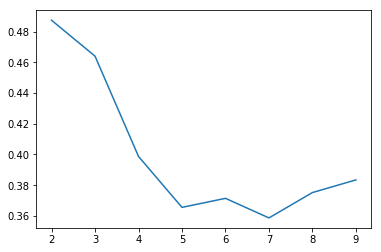

In [149]:
#Visualizing Silhouette Score :
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(DF)
    sse_.append([k, silhouette_score(DF, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);    

#### SSD :

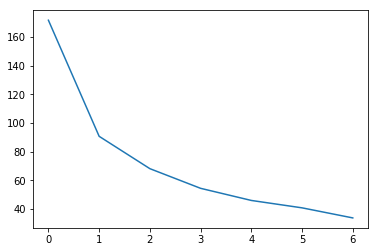

In [150]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(DF)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

#### From the dendrograms of single and comple linkage we can clearly see formation of 3 clusters. Also to confirm the same, we that the Silhouette Score at n =3 and Elbow Curve gives good result for 3 clusters.

In [151]:
kmeans = KMeans(n_clusters=3, max_iter=50,random_state = 50)
kmeans.fit(DF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [152]:
kmeans.labels_

array([2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2,
       1, 0, 0, 0, 1, 1, 2, 1, 2])

In [153]:
# assign the label
DF['cluster_id'] = kmeans.labels_
DF = pd.concat([DF, id], axis=1)
DF.head()

,PC1,PC2,PC3,cluster_id,ID
0,-2.629533,1.464633,-0.539736,2.0,100
1,NaN,NaN,NaN,NaN,101
2,-0.456254,-0.671282,0.958983,1.0,102
3,NaN,NaN,NaN,NaN,103
4,0.647900,-1.021302,-0.249353,1.0,104


In [154]:
#Dropping the NAN rows :
DF_final = DF.dropna(axis=0,thresh=None, subset=None, inplace=False)
DF_final.head()

,PC1,PC2,PC3,cluster_id,ID
0,-2.629533,1.464633,-0.539736,2.0,100
2,-0.456254,-0.671282,0.958983,1.0,102
4,0.647900,-1.021302,-0.249353,1.0,104
6,-0.331694,-1.270695,0.176106,1.0,106
7,3.170825,-0.250033,-0.116527,0.0,107


In [155]:
# Check the count of observation per cluster
DF_final['cluster_id'].value_counts()

1.0    61
2.0    31
0.0    27
Name: cluster_id, dtype: int64

#### Visualization of PC1 vs PC2 with respect to cluster_id :

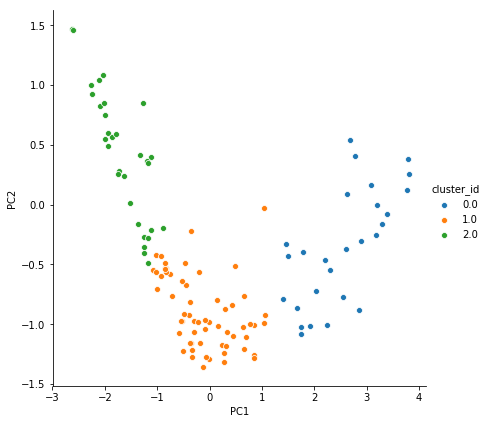

In [156]:
sns.pairplot(data=DF_final, x_vars=['PC1'], y_vars=['PC2'], hue = "cluster_id", size=6)

### Cluster Profiling :

In [157]:
# Let's merge the original data with the data(ClusterID)
dat5=pd.merge(data,DF_final, how = 'inner', on= 'ID')
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,PC1,PC2,PC3,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,-2.629533,1.464633,-0.539736,2.0
1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,-0.456254,-0.671282,0.958983,1.0
2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,0.647900,-1.021302,-0.249353,1.0
3,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,106,-0.331694,-1.270695,0.176106,1.0
4,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,107,3.170825,-0.250033,-0.116527,0.0


In [158]:
# Let's drop PCs from the data
dat6=dat5.drop(['PC1','PC2','PC3'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2.0
1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,1.0
2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,1.0
3,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,106,1.0
4,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,107,0.0


#### So we have performed the clustering using the PCs and have now allocated the clusterIDs back to each of the datapoints

### Cluster Analysis :

In [159]:
# Let's profile the cluster by taking the mean of various attributes
clu_gdpp = pd.DataFrame(dat6.groupby(["cluster_id"]).gdpp.mean())
clu_child_mort = pd.DataFrame(dat6.groupby(["cluster_id"]).child_mort.mean())
clu_income = pd.DataFrame(dat6.groupby(["cluster_id"]).income.mean())

In [160]:
# Let's concat the resultant with the Cluster ID columns
df = pd.concat([clu_gdpp,clu_child_mort,clu_income], axis=1)

In [161]:
# Let's add column name to it
df.columns = ["mean_gdpp","mean_child_mort","mean_income"]
df

,mean_gdpp,mean_child_mort,mean_income
cluster_id,,,
0.0,34696.296296,5.322222,37170.370370
1.0,6636.360656,20.221311,12796.557377
2.0,2072.161290,63.651613,4450.000000


#### For cluster 2 i.e the third cluster, the mean gdpp and mean income is the least among the three. Also it's mean child mort is the higest among the three. Thus, the countries belonging to cluster_id = 2 are in dire need of aid. 

#### Here we can differentiate as:
#### Cluster_ID = 0 : Developed Countries
#### Cluster_ID = 1 : Developing Countries
#### Cluster_ID = 2 : Under-Developed Countries

### Finding the observations that belong to cluster_id = 2 :

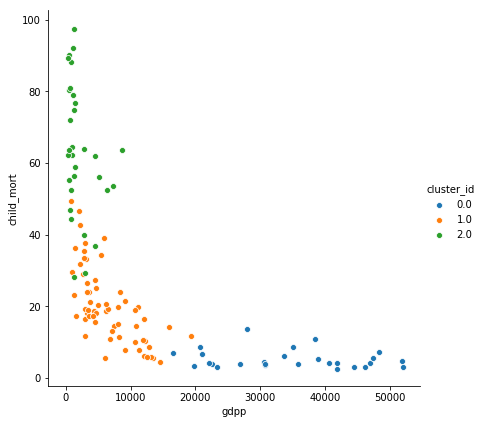

In [162]:
sns.pairplot(data=dat6, x_vars=['gdpp'], y_vars=['child_mort'], hue = "cluster_id", size=6)

#### Now we are pretty sure that countries belonging to cluster_id = 2 are in dire need of aid.

In [163]:
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2.0
1,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,102,1.0
2,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,104,1.0
3,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,106,1.0
4,Australia,4.8,19.8,8.73,20.9,41400,1.16,82.0,1.93,51900,107,0.0


In [164]:
# Filtering only those countries whith cluster_id = 2 :
options = [2]
final = dat6[dat6['cluster_id'].isin(options)]
final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2.0
15,Botswana,52.5,43.6,8.30,51.3,13300,8.92,57.1,2.88,6350,121,2.0
18,Cambodia,44.4,54.1,5.68,59.5,2520,3.12,66.1,2.88,786,127,2.0
24,Comoros,88.2,16.5,4.51,51.7,1410,3.87,65.9,4.75,769,136,2.0
25,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.70,60.4,4.95,2740,138,2.0


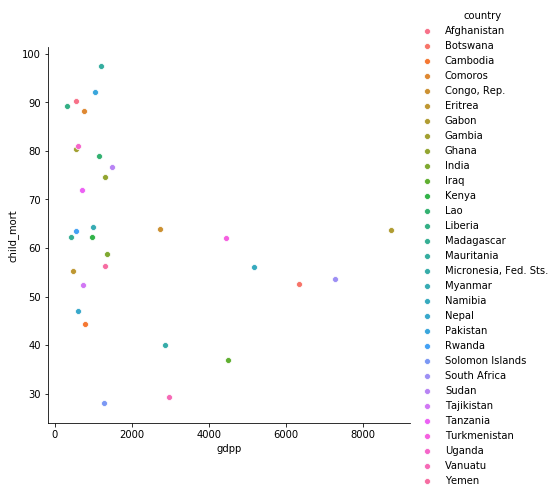

In [165]:
#Let's visualize those countries whose GDPP is the lease and child_mort is the highest from cluster_id = 2:
sns.pairplot(data=final, x_vars=['gdpp'], y_vars=['child_mort'], hue = "country", size=6)

#### From the above scatter plots it is clear that we need to target those countries whose GDPP is between 0 to 2000 and whose child_mort is between 85 to 100

Let's first sort the dataframe in the ascending order of GDPP and see the top 10 results :

In [171]:
final = final.sort_values('gdpp',ascending=True)
final1 = final.head(10)
final1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
64,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,188,2.0
67,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,193,2.0
33,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,150,2.0
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.44,56.2,5.82,553,100,2.0
39,Gambia,80.3,23.80,5.69,42.7,1660,4.30,65.5,5.71,562,156,2.0
90,Rwanda,63.6,12.00,10.50,30.0,1350,2.61,64.6,4.51,563,226,2.0
78,Nepal,47.0,9.58,5.25,36.4,1990,15.10,68.3,2.61,592,209,2.0
109,Uganda,81.0,17.10,9.01,28.6,1540,10.60,56.8,6.15,595,255,2.0
104,Tanzania,71.9,18.70,6.01,29.1,2090,9.25,59.3,5.43,702,247,2.0
103,Tajikistan,52.4,14.90,5.98,58.6,2110,12.50,69.6,3.51,738,246,2.0


In [172]:
final1.shape

(10, 12)

From this dataframe lets sort the column child_mort in the decreasing order and see the top 5 results :

In [174]:
final1 = final1.sort_values('child_mort',ascending=False)
final2 = final1.head(5)
final2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ID,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,100,2.0
64,Liberia,89.3,19.1,11.80,92.6,700,5.47,60.8,5.02,327,188,2.0
109,Uganda,81.0,17.1,9.01,28.6,1540,10.60,56.8,6.15,595,255,2.0
39,Gambia,80.3,23.8,5.69,42.7,1660,4.30,65.5,5.71,562,156,2.0
104,Tanzania,71.9,18.7,6.01,29.1,2090,9.25,59.3,5.43,702,247,2.0


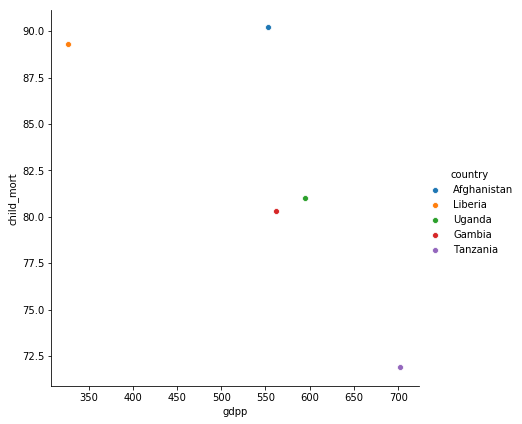

In [175]:
# Let's visualize them :
sns.pairplot(data=final2, x_vars=['gdpp'], y_vars=['child_mort'], hue = "country", size=6)

### Final Report :

#### List of 5 countries which are in direst need of aid from the analysis :

In [178]:
report = final2[['country','ID','cluster_id']]
report

,country,ID,cluster_id
0,Afghanistan,100,2.0
64,Liberia,188,2.0
109,Uganda,255,2.0
39,Gambia,156,2.0
104,Tanzania,247,2.0


#### So the list of 5 countires whose GDPP are the least and child_mort are the higest and needs dire attention from our Analysis are :
#### - Afghanistan
#### - Liberia
#### - Uganda
#### - Gambia
#### - Tanzania
    